# Hypothesis Testing

The general idea of hypothesis testing involves:
<ol type='1'>
<li>Making an initial assumption.
<li>Collecting evidence (data).
<li>Based on the available evidence (data), deciding whether to reject or not reject the initial assumption.
</ol>
Every hypothesis test, regardless of the population parameter involved requires the above three steps.

Hypothesis testing is the process used to evaluate the strength of evidence from the sample and provides a framework for making determinations related to the population, ie, it provides a method for understanding how reliably one can extrapolate observed findings in a sample under study to the larger population from which the sample was drawn

<img src="h.png">

# How to perform Hypothesis Testing

<b>$\underline{Step-1:}$</b>
<p>Alternate Hypothesis (Bold Claim): $$ H_1 \Rightarrow \ \geq,\  \leq , \neq $$
Null Hypothesis (Status Quo/Ground Truth): $$ H_0 \Rightarrow \ >,\  < , = $$
<b>$\underline{Step-2:}$</b>
<p><ul><li>Collect a sample of size n
<li>Compute the mean from this sample $ \bar{x} $</ul>
<b>$\underline{Step-3:}$</b>
<ul><li>If population Standard deviation $(\sigma)$ is known then we use Z-score;
$$ \text{Z =}\ \frac{\bar{X}-\mu}{\frac{\sigma}{\sqrt{n}}}    $$
<li>If population Standard deviation $(\sigma)$ is unknown then we can sample standard deviation $(s)$ and calculate t-score;
$$ \text{t =}\ \frac{\bar{X}-\mu}{\frac{s}{\sqrt{n}}}    $$
where std.dev. is given by, $$ s = \sqrt\frac{\sum({x-\bar{x})^{2}}}{n-1}$$

$\underline{Step-4:}$ <p> Decide the Significance Level $(\alpha)$:
Lower $ \alpha $ means you need stronger evidence to reject Null Hypothesis.
$$ \alpha = 1 - \text{confidedence} $$
    
$\underline{Step-5.1:}$ Apply the Decision Rule:
<ol type="a">
    <li>If test statistic is <b>Z-score </b>:
        <ul>
        <li> Two tailed Z-test: 
            $$ |z| \ > z_{\frac{\alpha}{2}} \ \Rightarrow \ \text{Accept $H_{1}$} \ or \ \ \text{Reject $H_{0}$} $$
        <li> Right tailed Z-test: 
            $$ z \ > z_{\alpha} \ \Rightarrow \ \text{Accept $H_{1}$} \ or \ \ \text{Reject $H_{0}$} $$
        <li> Left tailed Z-test: 
            $$ z \ < z_{\alpha} \ \Rightarrow \ \text{Accept $H_{1}$} \ or \ \ \text{Reject $H_{0}$} $$
            </ul>
     <li>If test statistic is <b>t-score</b> :
        <ul>
        <li> Two tailed t-test: 
            $$ |t| \ > t_{n-1,\frac{\alpha}{2}} \ \Rightarrow \ \text{Accept $H_{1}$} \ or \ \ \text{Reject $H_{0}$} $$
        <li> Right tailed Z-test: 
            $$ t \ > t_{(n-1),\frac{\alpha}{2}} \ \Rightarrow \ \text{Accept $H_{1}$} \ or \ \ \text{Reject $H_{0}$} $$
        <li> Left tailed Z-test: 
            $$ t \ < t_{(n-1),\frac{\alpha}{2}} \ \Rightarrow \ \text{Accept $H_{1}$} \ or \ \ \text{Reject $H_{0}$} $$
         </ul>
</ol>
$\underline{Step-5.2:}$ Compute p-value - $ P(\text{Test Statistics}|H_{0})$
<ul>
    <li>For two tailed test:
        $$ \text{p value} \ = 2*(1.0-cdf(\text{test statistic})) $$
    <li>For one tailed test:
        $$ \text{p value} \ = (1.0-cdf(\text{test statistic}) $$
     Now, 
        $$ if \ (\text{p value} < \alpha) \ \Rightarrow \ \text{Accept $H_{1}$} \ or \ \ \text{Reject $H_{0}$}    $$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import t
import pandas as pd
def t_score(sample_mean,sample_size,pop_mean,sample_std):
    numerator = sample_mean - pop_mean
    denominator = sample_std/(sample_size)**0.5
    return numerator/denominator

# Questions - Population Unknown Standard Deviation 


### <b>Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim? 

<B>Step-1 :</B>Formulate the Null Hypothesis and Alternate hypothesis<p>
Alternate Hypothesis (Bold claim) 𝐻1: $ \mu \neq 500 $<br>
Null Hypothesis (Status Quo) 𝐻0: $ \mu = 500 $

<B>Step-2</B> Defining the Sample and Population Parameters<p>
Collect the Sample of size of $\ n $ : <br>
sample =[ 490, 220, 470, 510,420,410,490, 498, 508, 480] <br>
Complute the Mean from this sample $ \ \bar{X} $<br>

In [2]:
sample =  [ 490, 220, 470, 510,420,410,490, 498, 508, 480] 
sample_mean = sum(sample)/len(sample)
sample_size = len(sample)
population_mean = 500

def sddd(sample):
    s = 0
    n = len(sample)
    for i in sample:
        s += (i-sample_mean)**2
    sample_std = (s/(n-1))**0.5   
    return(sample_std)
sample_std = sddd(sample)

<B>Step-3:</B> Compute Test Statistic<p>
population standard deviaton is unknown so we go for t-score:
    $$ t = \frac{\bar{x}-\mu}{\frac{s}{\sqrt{n}}} $$

In [3]:
tscore = t_score(sample_mean,sample_size,population_mean,sample_std)
print("Value of t-score:",tscore)

Value of t-score: -1.8180432274804879


<B>Step-4</B><p>
Decide $ \alpha $ or significance level<br>
Two Tail - Calculating the t-critical value

In [4]:
alpha = 1 - 0.95

t_critical = t.ppf(1-alpha/2, df = 9)

print("T-critical : ",t_critical)


T-critical :  2.2621571627409915


<b>Step- 5.1:</b> Conclusion using t test

<br>
For two tailed test:

In [5]:
if(np.abs(tscore) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


<b>Step- 5.2:</b> Compute p-value and determing results:
<br>
For two tailed test:
$$ \text{p value} \ = 2*(1.0-cdf(\text{test statistic})) $$
<br>
Now, 
$$ if \ (\text{p value} < \alpha) \ \Rightarrow \ \text{Accept $H_{1}$} \ or \ \ \text{Reject $H_{0}$}    $$

In [6]:

pval = 1.0 - t.cdf(np.abs(tscore), df = 9)

print("p_value = ", pval)

if(pval < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.05121031528587083
Fail to reject Null Hypothesis


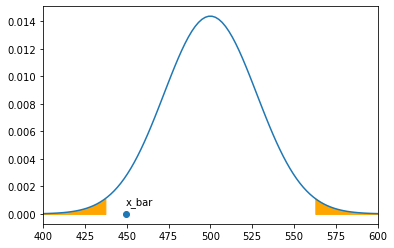

In [7]:
x_min = 400
x_max = 600
mean = population_mean
std = sample_std / sample_size**0.5
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)
t_critical_left = population_mean + (-t_critical * std)
t_critical_right = population_mean + (t_critical * std)
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))
plt.show()

### Q.1 Answer - We fail to Reject Null Hypothsis
We cannot say a packet of biryani does not contain 500 grams

### <B>Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client?</B>


<B>Step - 1:</B>Formulate the Null Hypothesis and Alternate hypothesis<br>
<ul>
    <li>Alternate Hypothesis (Bold Claim): $$ H_1: \ \text{Average rating}: \  \mu > 4 $$ 
    <li>Null Hypothesis (Status Quo): $$ H_0: \ \text{Average rating}:  \ \mu \ \leq 4 $$
        </ul>
<B>Step - 2:</B>Defining the Sample and Population Parameters
<br>
<ul>
    Collect a sample of size n = 20 <br>sample= [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 3,4,5,2]
    <br>Compute sample mean <br> $$ \ \bar{x} = {}? $$

In [8]:
sample = [4,5,5,3,4,4,5,5,3,4,2,4,5,3,4,5,4,4,5,4]

sample_mean = sum(sample)/len(sample)
print(sample_mean)
sample_size = len(sample)
print(sample_size)
population_mean = 4


4.1
20


<B>Step-3:</B> Compute Test Statistic<p>
population standard deviaton is unknown so we go for t-score:
    $$ t = \frac{\bar{x}-\mu}{\frac{s}{\sqrt{n}}} $$

In [9]:
sample_std = sddd(sample)  
print("SD is: ",sample_std)

tscore =  t_score(sample_mean,sample_size,population_mean,sample_std)
print("t-score is",tscore)

SD is:  0.8522416262267903
t-score is 0.5247497678328003


<B>Step-4</B>
Decide $ \alpha $ or significance level<br>
Two Tail - Calculating the t-critical value<br>
One tail test with 95% of confidence


In [10]:
alpha = 1 - 0.95

t_critical = t.ppf(1-alpha, df = 19)

print("T-critical : ",t_critical)


T-critical :  1.729132811521367


<b>Step- 5.1:</b> Conclusion using t test

<br>
For one tailed test:

In [11]:
if(np.abs(tscore) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


<b>Step- 5.2:</b> Compute p-value and determing results:
<br>
For one tailed test:
$$ \text{p value} \ = 2*(1.0-cdf(\text{test statistic})) $$
<br>

$$ if \ (\text{p value} < \alpha) \ \Rightarrow \ \text{Accept $H_{1}$} \ or \ \ \text{Reject $H_{0}$}    $$

In [12]:
# Conclusion by p test
p_value = (1.0 - norm.cdf(np.abs(tscore)))
print("P_value:",p_value)
if (p_value<alpha):
    print("Reject null hypothesis")
else:
    print("Failed to reject null hypothesis")

P_value: 0.29987857769467896
Failed to reject null hypothesis


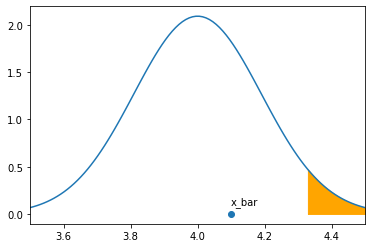

In [13]:
x_min = 3.5
x_max = 4.5
mean = population_mean
std = sample_std / (sample_size**0.5)
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)
t_critical_right = population_mean + (t_critical * std)
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))
plt.show()

### Q.2 Answer - We fail to Reject Null Hypothsis
We cannot say a average rating is not less than 4

### <B>Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre?</B>


<B>Step - 1:</B>Formulate the Null Hypothesis and Alternate hypothesis<br>
<ul>
    <li>Alternate Hypothesis (Bold Claim): $$ H_1: \ \text{Average Mileage}: \  \mu \geq  15 km/litre $$ 
    <li>Null Hypothesis (Status Quo): $$ H_0: \ \text{Average Mileage}:  \ \mu \ < 15 km/litre $$
        </ul>
<B>Step - 2:</B>Defining the Sample and Population Parameters
<br>
<ul>
    Collect a sample of size n = 20 <br>sample= [14.22,14.31,15.33,13.47,16.27,15.47,13.91,14.57,16.66,13.3,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,13.88,14,42]
    <br>Compute sample mean <br> $$ \ \bar{x} = {}? $$

In [14]:
sample = [14.22,16.33,13.47,16.27,14.47,15.91,14.57,15.66,13.3,15.36,13.81,15.53,15.79,14.81,15.98,13.23,16.43,13.88,14.42,15.56]

sample_mean = sum(sample)/len(sample)
print(sample_mean)
sample_size = len(sample)
print(sample_size)
population_mean = 15


14.95
20


<B>Step-3:</B> Compute Test Statistic<p>
population standard deviaton is unknown so we go for t-score:
    $$ t = \frac{\bar{x}-\mu}{\frac{s}{\sqrt{n}}} $$

In [15]:
sample_std = sddd(sample)
print("SD is: ",sample_std)

tscore =  t_score(sample_mean,sample_size,population_mean,sample_std)
print("t-score is",tscore)

SD is:  1.0620238871334788
t-score is -0.21054780448820404


<B>Step-4</B>
Decide $ \alpha $ or significance level<br>
Two Tail - Calculating the t-critical value<br>
One tail test with 95% of confidence


In [16]:
alpha = 1 - 0.95

t_critical = t.ppf(1-alpha, df = 19)

print("T-critical : ",t_critical)


T-critical :  1.729132811521367


<b>Step- 5.1:</b> Conclusion using t test

<br>
For one tailed test:

In [17]:
if(np.abs(tscore) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


<b>Step- 5.2:</b> Compute p-value and determing results:
<br>
For one tailed test:
$$ \text{p value} \ = 2*(1.0-cdf(\text{test statistic})) $$
<br>

$$ if \ (\text{p value} < \alpha) \ \Rightarrow \ \text{Accept $H_{1}$} \ or \ \ \text{Reject $H_{0}$}    $$

In [18]:
# Conclusion by p test
p_value = (1.0 - norm.cdf(np.abs(tscore)))
print("P_value:",p_value)
if (p_value<alpha):
    print("Reject null hypothesis")
else:
    print("Failed to reject null hypothesis")

P_value: 0.41662007257205624
Failed to reject null hypothesis


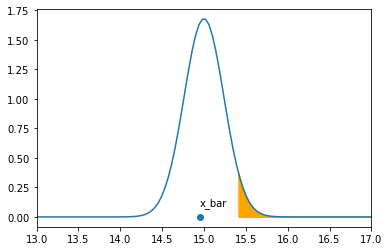

In [19]:
x_min = 13
x_max = 17
mean = population_mean
std = sample_std / (sample_size**0.5)
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)
t_critical_right = population_mean + (t_critical * std)
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))
plt.show()

### Q.3 Answer - We fail to Reject Null Hypothsis
We cannot say average mileage is not 15 km per litre

### <B>Q.4. You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim?</B>


<B>Step - 1:</B>Formulate the Null Hypothesis and Alternate hypothesis<br>
<ul>
    <li>Alternate Hypothesis (Bold Claim): $$ H_1: \ \text{Average rating}: \  \mu < 100 $$ 
    <li>Null Hypothesis (Status Quo): $$ H_0: \ \text{Average rating}:  \ \mu \ \geq 100 $$
        </ul>
<B>Step - 2:</B>Defining the Sample and Population Parameters
<br>
<ul>
    Collect a sample of size n = 25 <br>sample= [55,99,104,160,155,66,78,34,67,154,88,142,95,104,97,108]
    <br>Compute sample mean <br> $$ \ \bar{x} = {}? $$

In [20]:
sample = [75,99,104,160,155,76,78,34,67,154,88,142,95,104,97,108,132,97,126,94]
sample_mean = sum(sample)/len(sample)
print(sample_mean)
sample_size = len(sample)
print(sample_size)
population_mean = 100


104.25
20


<B>Step-3:</B> Compute Test Statistic<p>
population standard deviaton is unknown so we go for t-score:
    $$ t = \frac{\bar{x}-\mu}{\frac{s}{\sqrt{n}}} $$

In [21]:
sample_std = sddd(sample)

tscore =  t_score(sample_mean,sample_size,population_mean,sample_std)
print("t-score is",tscore)

t-score is 0.5844538597292439


<B>Step-4</B>
Decide $ \alpha $ or significance level<br>
Two Tail - Calculating the t-critical value<br>
One tail test with 95% of confidence


In [22]:
alpha = 1 - 0.95

t_critical = t.ppf(1-alpha, df = 24)

print("T-critical : ",t_critical)


T-critical :  1.7108820799094275


<b>Step- 5.1:</b> Conclusion using t test

<br>
For one tailed test:

In [23]:
if(np.abs(tscore) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


<b>Step- 5.2:</b> Compute p-value and determing results:
<br>
For one tailed test:
$$ \text{p value} \ = 2*(1.0-cdf(\text{test statistic})) $$
<br>

$$ if \ (\text{p value} < \alpha) \ \Rightarrow \ \text{Accept $H_{1}$} \ or \ \ \text{Reject $H_{0}$}    $$

In [24]:
# Conclusion by p test
p_value = (1.0 - norm.cdf(np.abs(tscore)))
print("P_value:",p_value)
if (p_value<alpha):
    print("Reject null hypothesis")
else:
    print("Failed to reject null hypothesis")

P_value: 0.27945749970362255
Failed to reject null hypothesis


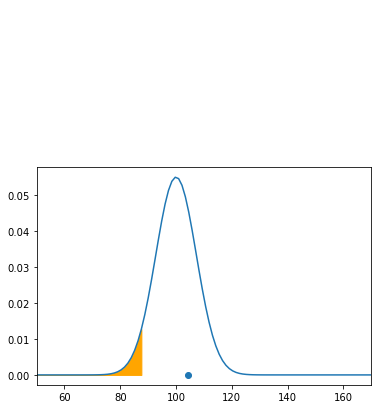

In [25]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 50
x_max = 170


# Defining the sampling distribution mean and sampling distribution std
mean = population_mean
std = sample_std / (sample_size**0.5)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left critical value (Left tailed Test)
t_critical_right = population_mean + (-t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min,t_critical_right, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))
plt.show()

### Q.4 Answer - We fail to Reject Null Hypothsis
We cannot say average time taken is not grater than or equal than 100ms